### Exercise 1.1

Express each of the following tasks in the framework of learning from data by specifying the input space $X$, output space $Y$, target function $f:X \mapsto Y$, and the specifics of the data set that we will learn from.

(a) Medical diagnosis: A patient walks in with a medical history and some symptoms and you want to identify the problem.
- $X = \text{symptoms and medical history}$,  $Y=\text{0 or 1 for types of problems}$. Creating a dataset with real data, that maintains consistent concepts between medical institutions, cities, countries seems to be very challeging. On the other side, local, one institution datasets seems not hard to find. We could also build a dataset, synthesing data from medical books.


(b) Handwritten digit recognition (for example postal zip code recognition for mail sorting)
- $X = \text{small square bitmaps (64x64) with one character}$, $Y=\text{one output for each classificable character with domain from 0 to 1 that represents the probability of each character }$. We could partner the mail company to get photos from real mail. We could also synthesise data using computer fonts and image processing to create artificial deformations.


(c) Determine if a e-mail is spam or not.
- $X = \text{current mail, history of classified emails as spam or not}$, $Y=\text{probability of email being spam}$. We should have access to email contents. Seems clear to me that e-mail providers should have a good advantage to having capabilities to find this kind of data. What is the limit of using kind of personal data wihthout explicit acknownledge from customers?$

(d) Predicting how an electric load varies with price, temperature, and day of the week.
- $X = \text{current price temperature day and historical data} $, $Y=\text{current load}$. I think we could use other features, as localization, day of year, solar activity, current economy moody...


(e) A problem of interest of you for which there is no analytical solution, but you hava data from which to construct an empirical solutions.
- $X = \text{a text lyric}$, $Y=\text{probaility of this song be from Caetano Veloso}$, $f \text{should take in account all songs from him}$

## Exercise 1.2

Suppose that we use a perceptron to detect spam messages. Let´s say that each email message is represented by frequency of ocurrency of keywords, and the output is $+1$ if the message is considered spam.

(a) Can you think of some keywords that will end up with a large positive weight in the perceptron? A: Looking my gmail spam folder I find a lot of suspect keyworkds as casino, bonus, WINNER, fortune.

(b) How about keywords that will get negative weight? A: I think that my name spelled correcly should have a negative weight.


(c) What parameter in the percecptron directly affects how many borderline messages end up being classified as spam. A: The bias term $b$ configure the detection threshold.


comments: representing text in frequency of occurence refers to bag-of-words model.


## Exercise 1.3

The weight update rule in (1.3) has the nice interpretation that it moves in the direction of classfying $x(t)$ correctly.

(a) Show that $y(t) w^T x(t) \lt 0$.

answer: We can the product in two terms: $\text{Term 1}=y(t)$ and $\text{term 2}=w^T x(t)$.  This product will be negative when those terms have different signs. Term 1 represents the ground truth and Term 2 represents the predicted value. So, the product will be negative predicted value (Trm 2) is differente form ground truth value (Term1). In other words $y(t) w^T x(t) \lt 0$ is true when $x(t)$ is miclassified by $w(t)$.


(b) Show that $y(t) w^T (t+1) x(t) \gt  y(t) w^T x(t)$

answer: 

$y(t) w^T (t+1) x(t)  = y(t) (w(t) + y(t) x(t)   )^T x(t)$

$ = y(t)(w^T(t) + y(t)x^T))x(t)$

$ = y(t) w^T x(t) + y(t) y(t) x^T(t) x(t)$

rewriting:

 $y(t) w^T x(t) + y(t) y(t) x^T(t) x(t) \gt y(t) w^T x(t)$

 as $y(t) y(t) x^T(t) x(t)$ is always positive we can conclude the the inequality is true.


 (c) The PLA update rule shows that updated value will the contrary sign of misclassified point. It is like a big jump in contrary of error. 
 




## Exercise 1.4

Let us create our function $f$ and data set $D$ and see how the perceptron learning algorithm works (PLA). Take $d=2$ so you can visualize the problem, and choose a random line in the plane as your target function, where one side of the line maps to $+1$ and the other side maps to $-1$. Choose the inputs $x_n$ of the data set as random points in the plane, and evaluate the target function on each $x_n$ to get the corresponding output $y_n$.

Now, generate a dataset of size $20$. Try the perceptron learning algorithm on your data set and see how long it takes to converge and how well the final hyphotesis $g$ matches your target $f$. You can find other ways to play with this exprimento in Problem 1.4.

f(x) unknown function


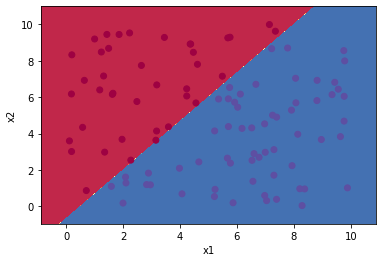

In [173]:
import numpy as np
import matplotlib.pyplot as plt

def f(X):
    points = (-3*X[:,2].T + (4 * X[:,1]).T - 2).reshape(-1,1)
    return np.where(points >= 0, 1, -1)

def generateX(n, amplitude=10, seed=0): 
    np.random.seed(seed)
    X = np.random.rand(n,2)*amplitude
    return np.column_stack( [np.ones((X.shape[0],1)), X ])

X = generateX(100)
Y = f(X)



# adapted from coursera Neural Networks and Deep learning course
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    points = np.c_[xx.ravel(), yy.ravel()]
    points = np.column_stack( [np.ones((points.shape[0],1)), points ])
    # Predict the function value for the whole grid
    Z = model(points)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Spectral)

plot_decision_boundary(f, X, Y)

def predict(X, weights):
    value = np.dot(weights, X.T).T
    return np.where(value >= 0, 1, -1)

def PLA(X, Y, iterations=100, seed=0):
    weights_history = []
    current_weight = np.zeros((1,X.shape[1]))
    weights_history.append(current_weight)
    
    
    for i in range(iterations):
        predicted = predict(X, current_weight)
        for result_i in range(len(Y)):
            if predicted[result_i] != Y[result_i]:
                # print('current weight', current_weight, ', y', Y[result_i], ', missed X', X[result_i,:], ', new weight',  current_weight + Y[result_i] * X[result_i,:])
                current_weight = current_weight + Y[result_i] * X[result_i,:]
                weights_history.append(current_weight)
                break

    return (current_weight, weights_history)

print('f(x) unknown function')

converged in 141 iterations, found weights [[-14.          49.00089618 -38.798727  ]]
g(x) selected hypothesis function


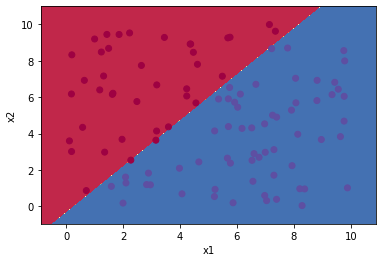

In [102]:
weights, history = PLA(X,Y, iterations=10000)
print('converged in', str(len(history)), 'iterations, found weights', weights)
print('g(x) selected hypothesis function')
plot_decision_boundary(lambda X: predict(X, weights), X, Y)
# prediction = predict(X, weights)
# prediction == Y

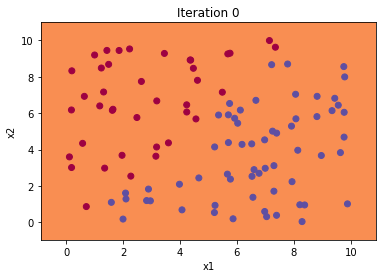

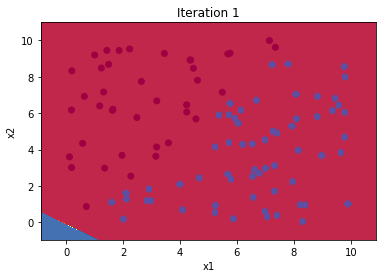

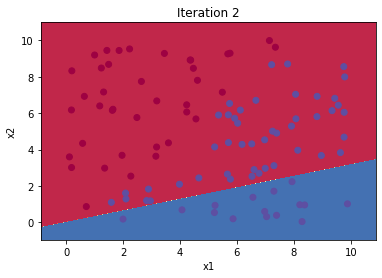

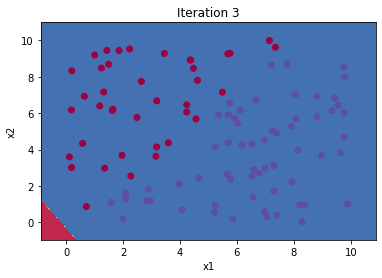

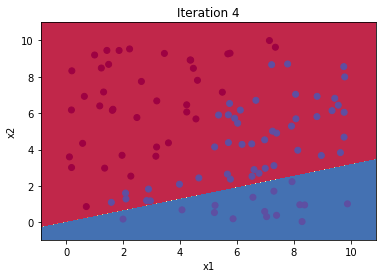

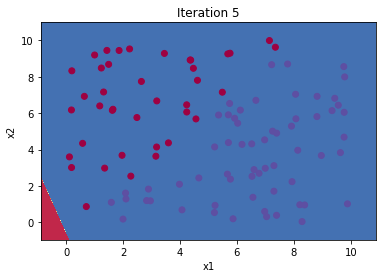

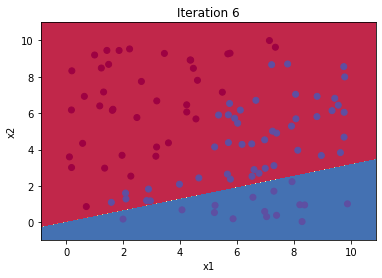

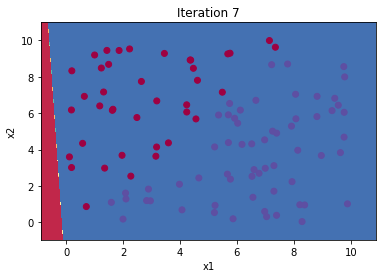

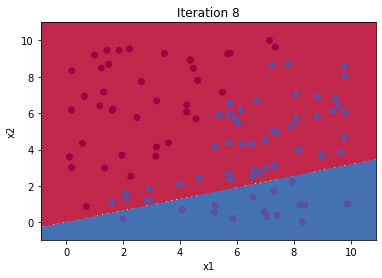

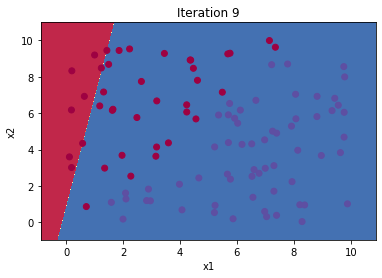

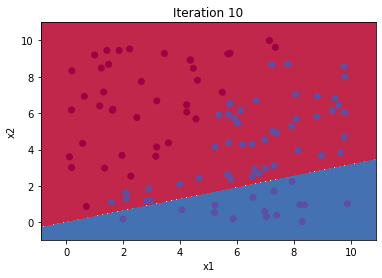

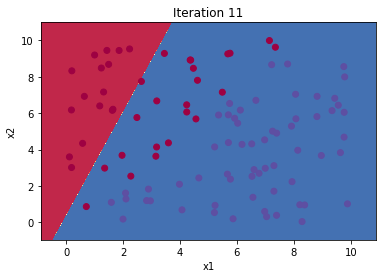

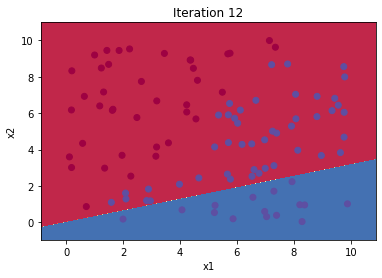

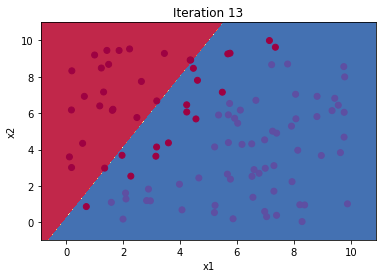

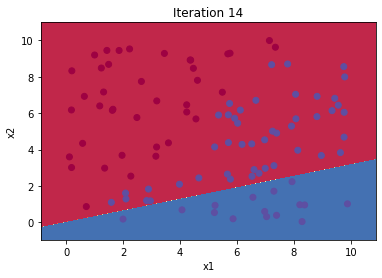

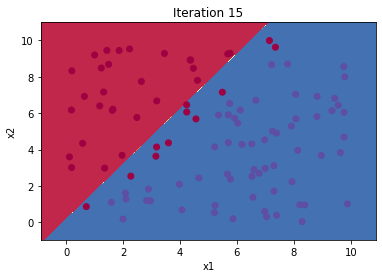

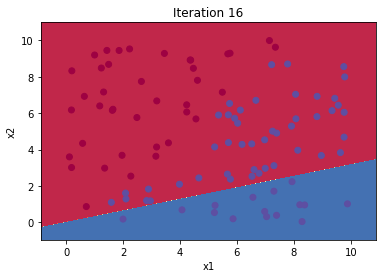

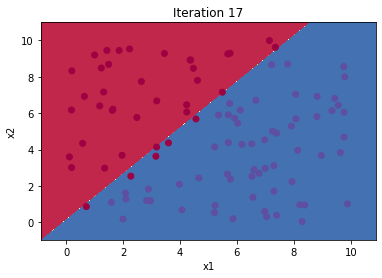

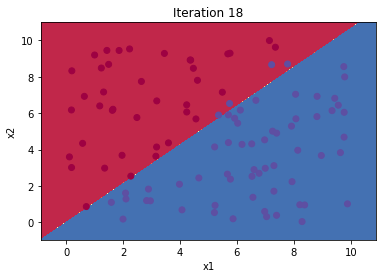

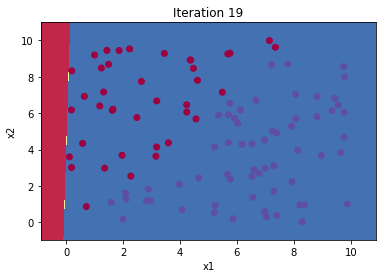

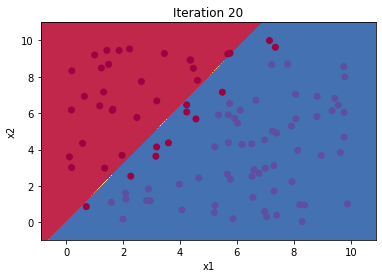

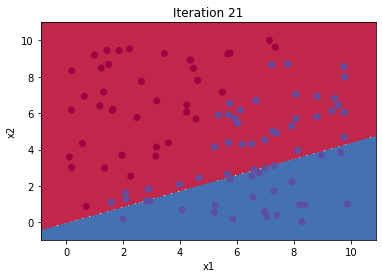

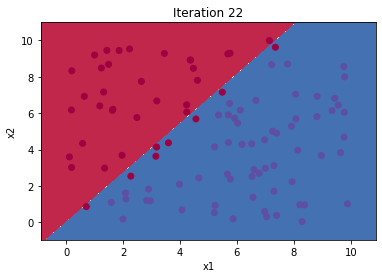

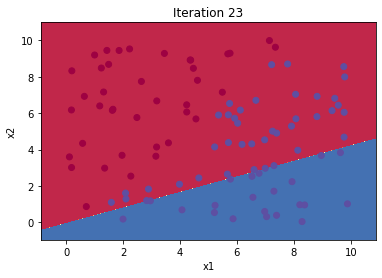

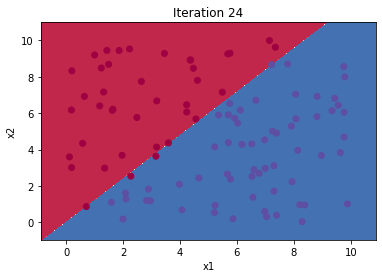

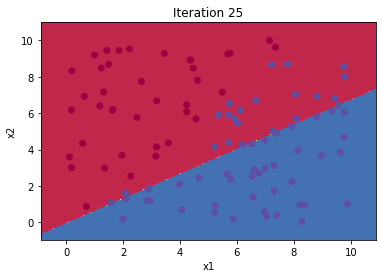

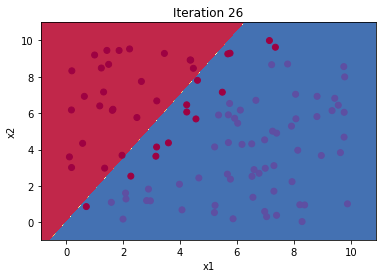

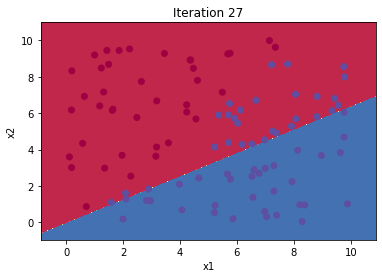

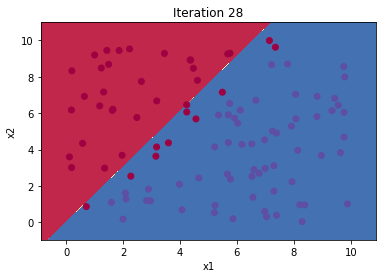

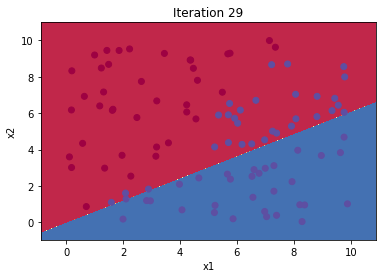

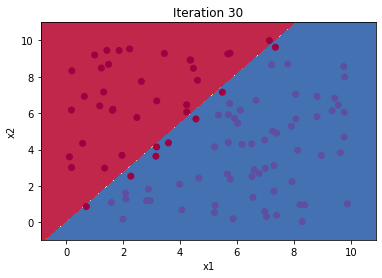

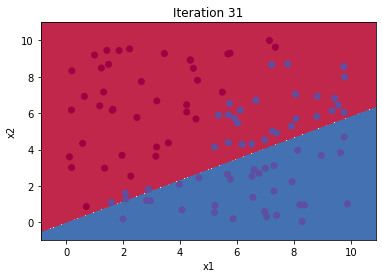

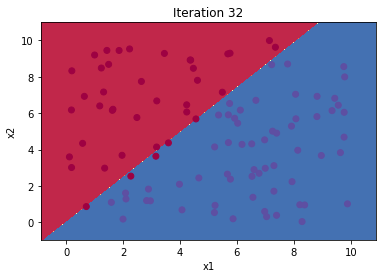

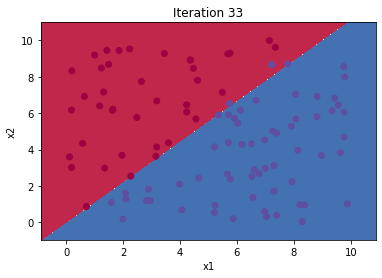

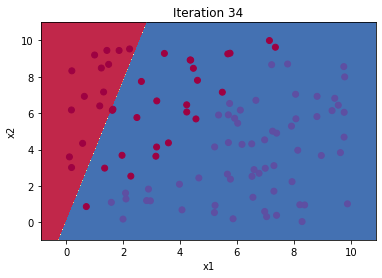

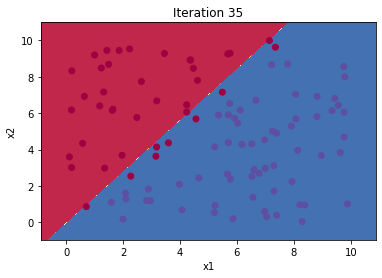

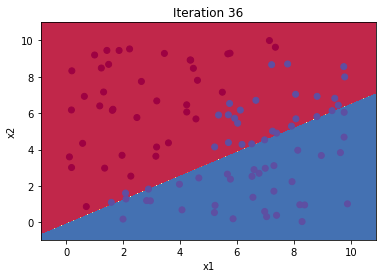

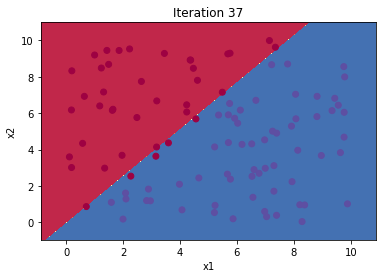

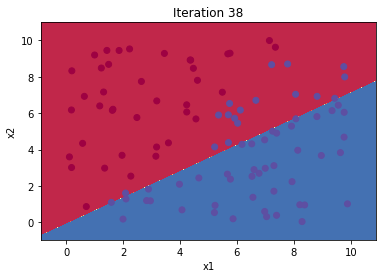

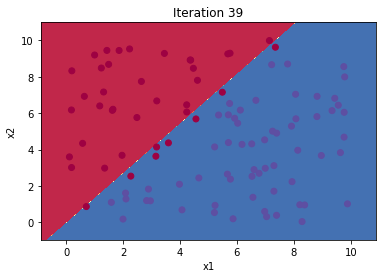

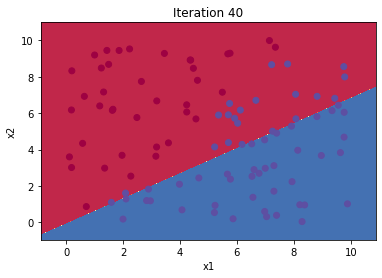

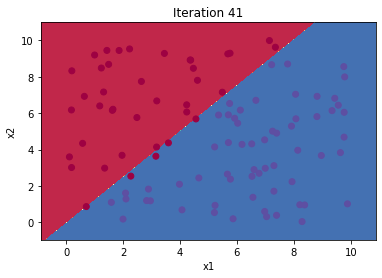

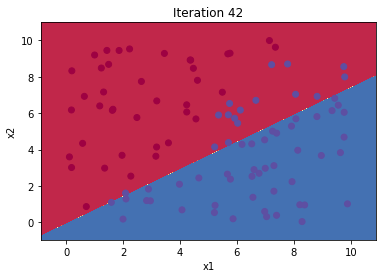

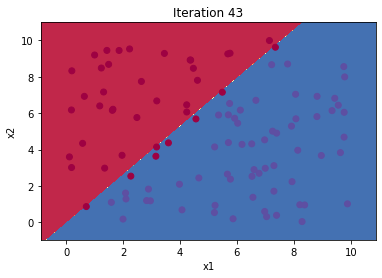

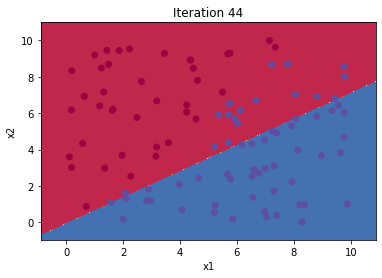

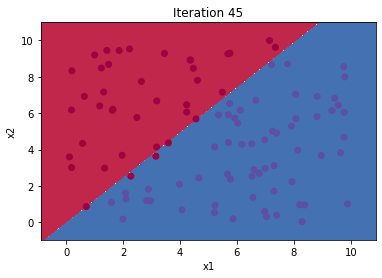

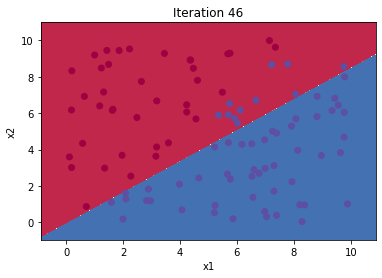

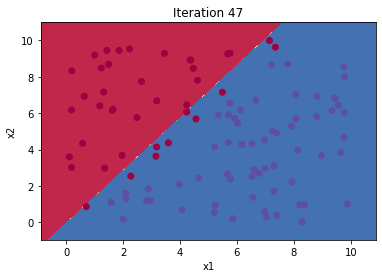

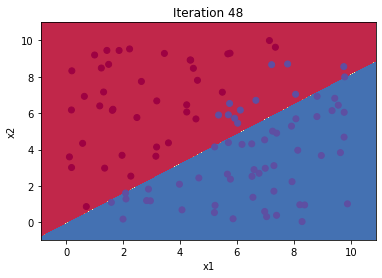

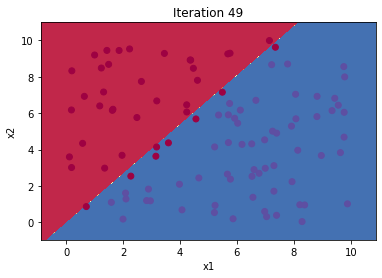

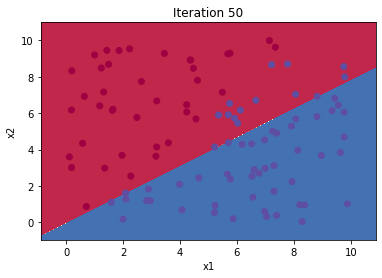

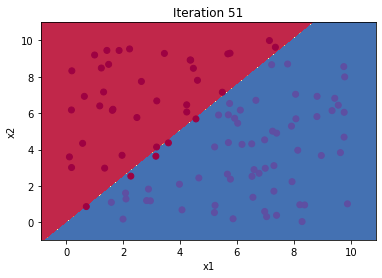

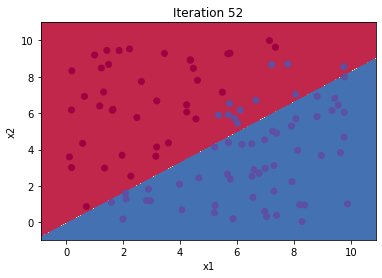

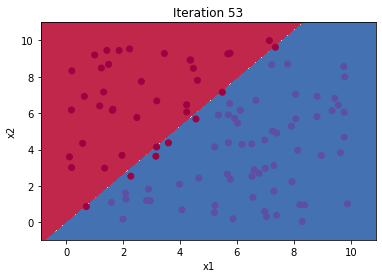

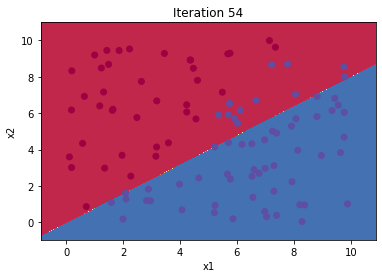

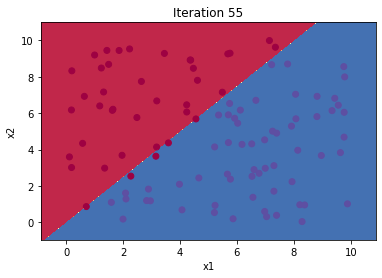

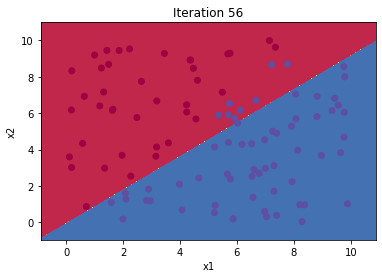

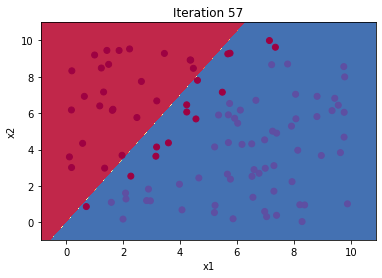

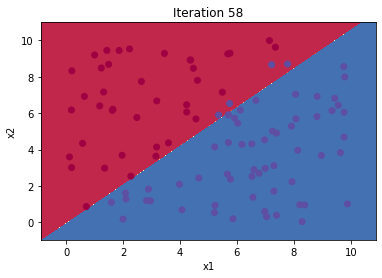

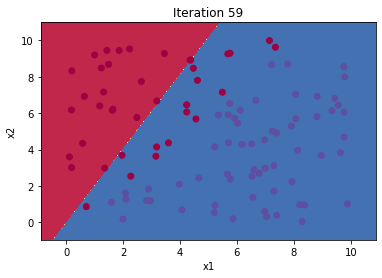

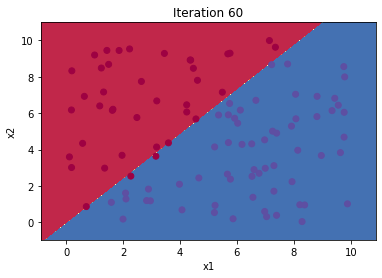

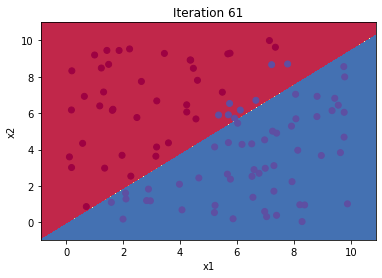

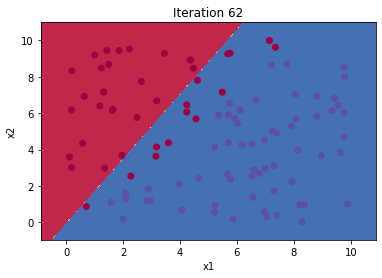

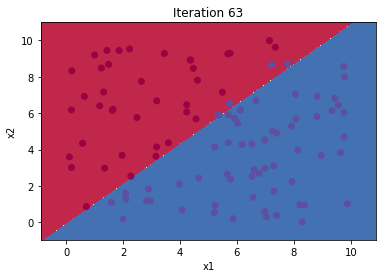

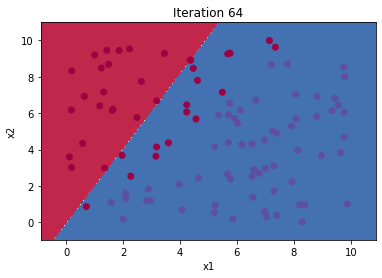

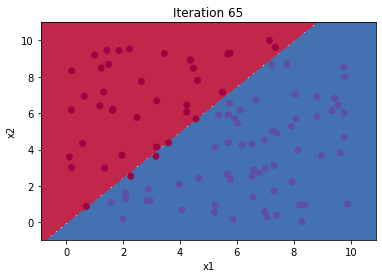

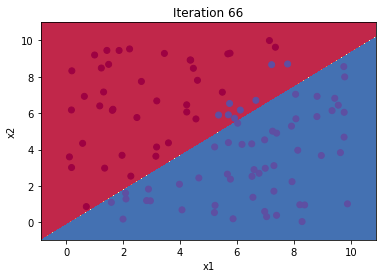

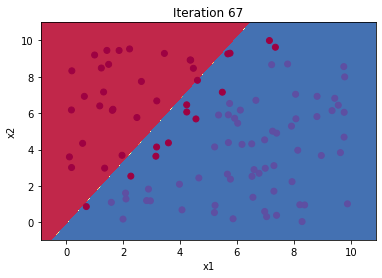

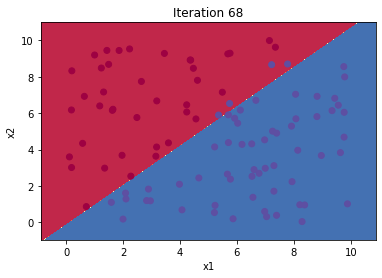

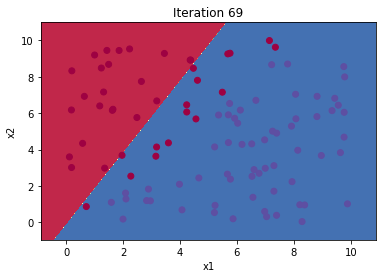

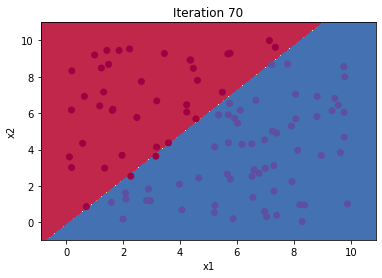

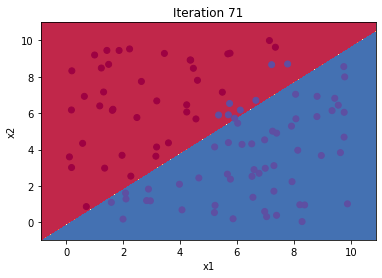

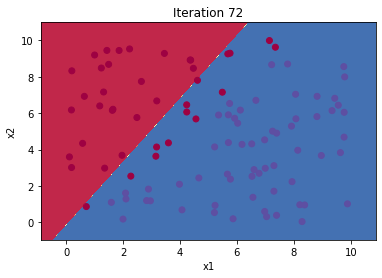

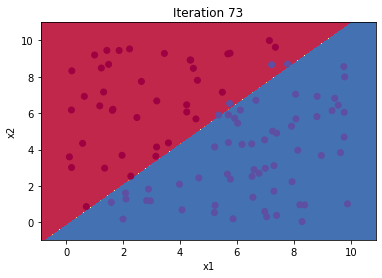

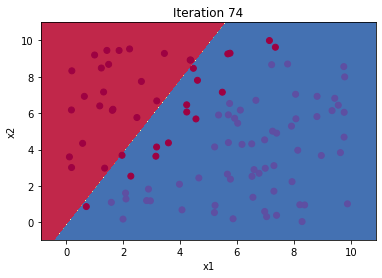

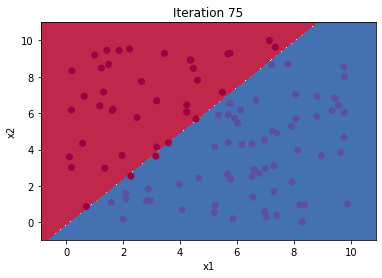

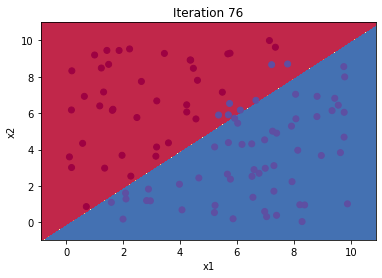

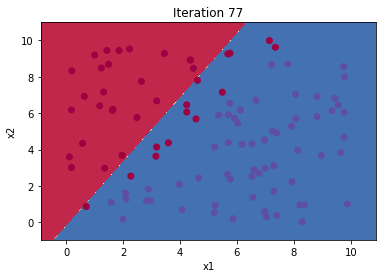

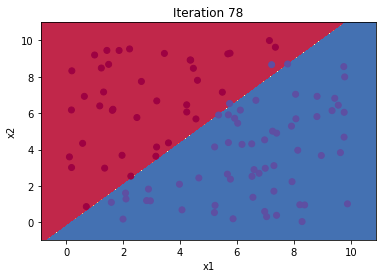

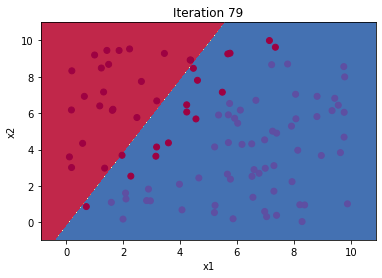

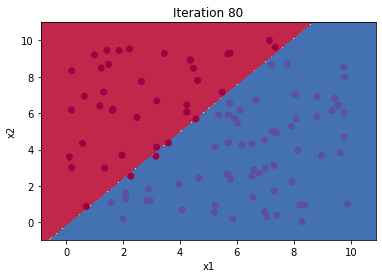

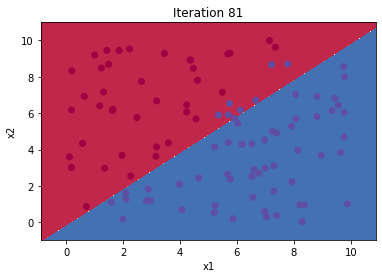

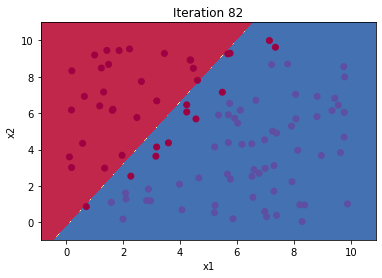

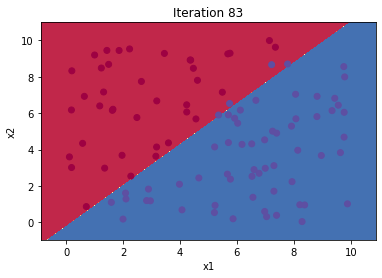

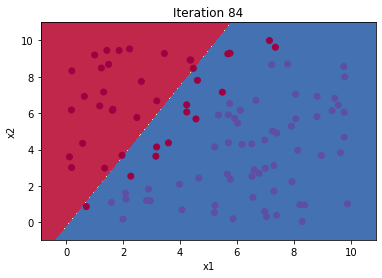

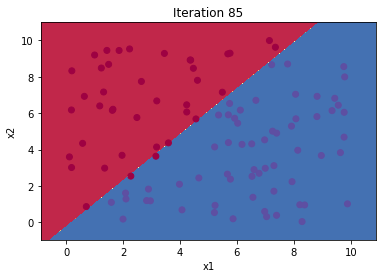

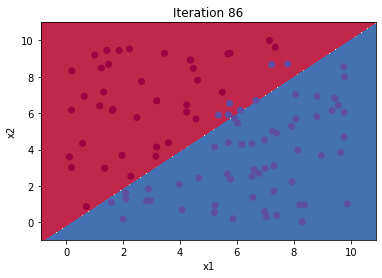

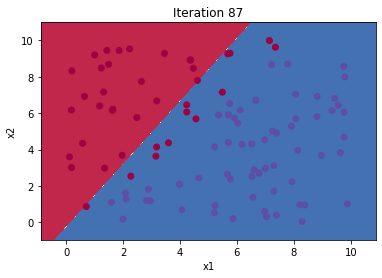

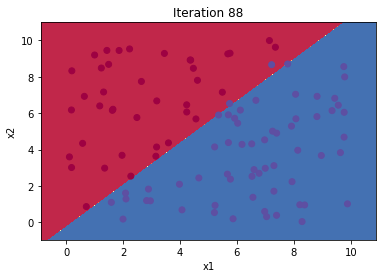

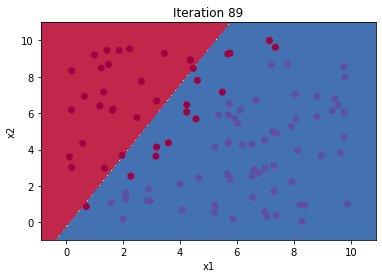

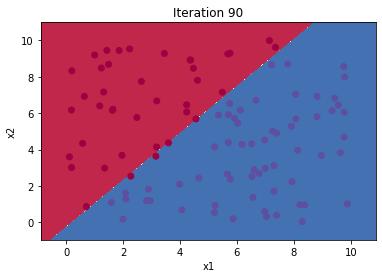

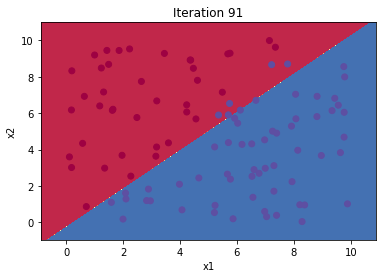

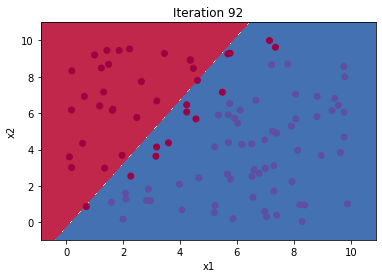

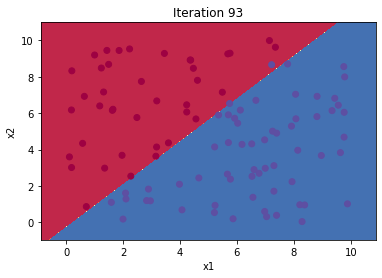

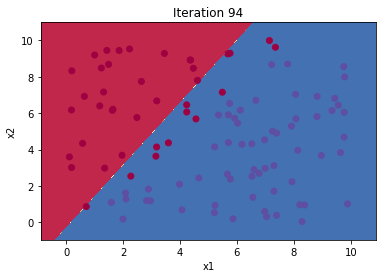

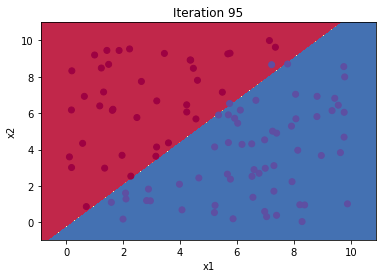

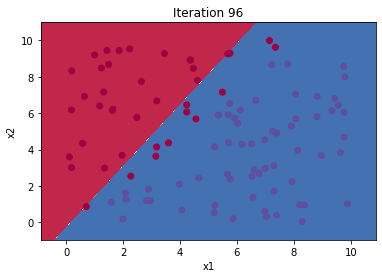

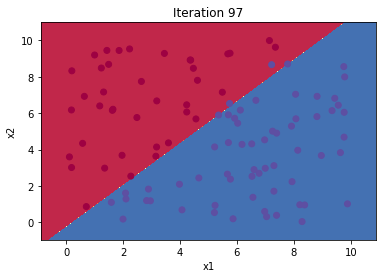

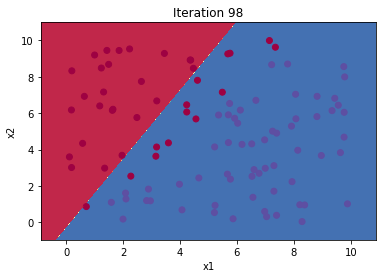

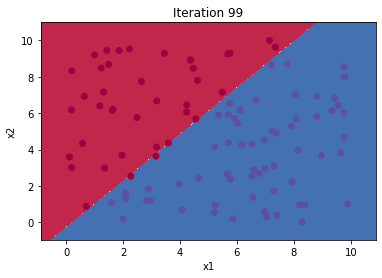

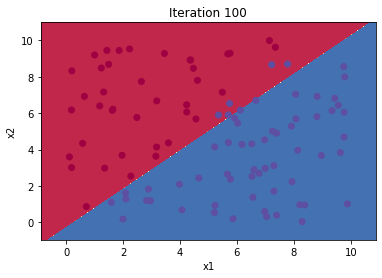

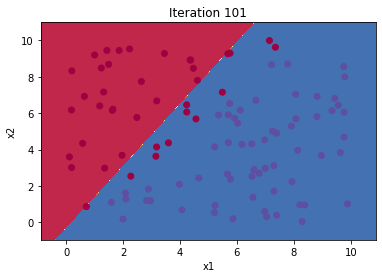

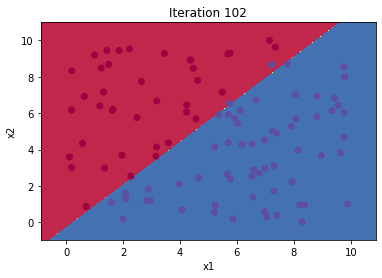

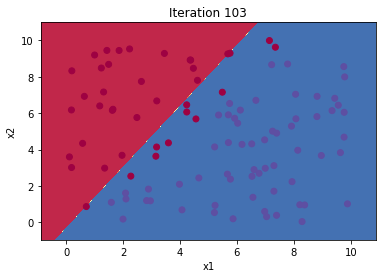

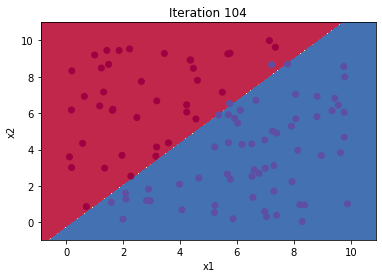

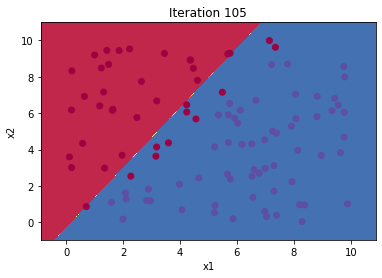

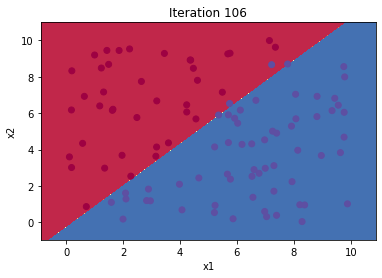

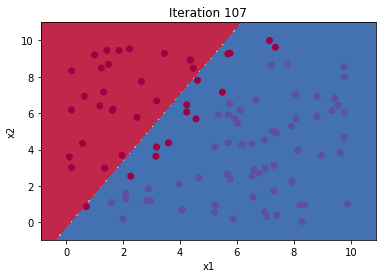

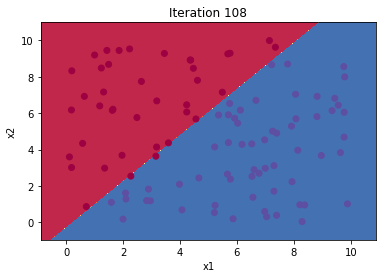

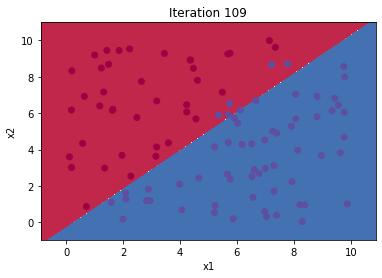

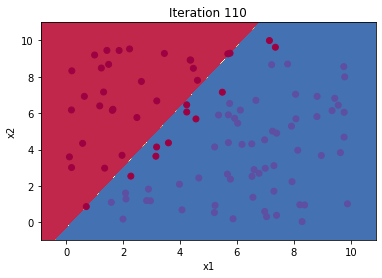

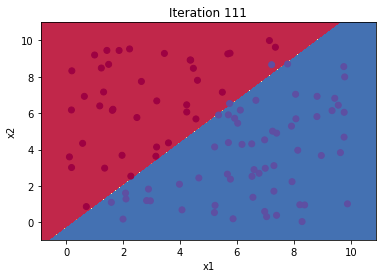

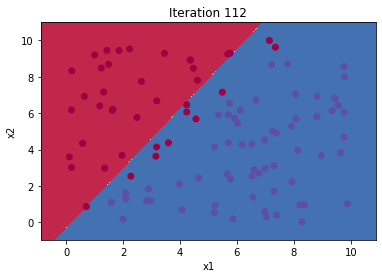

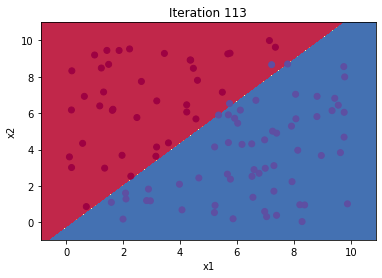

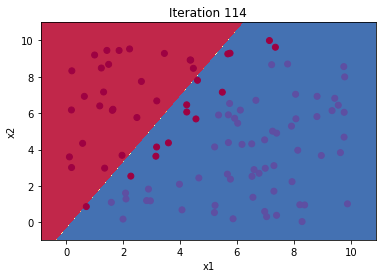

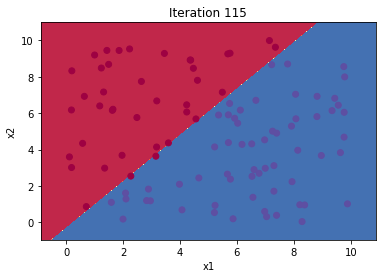

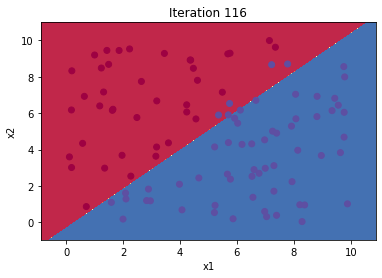

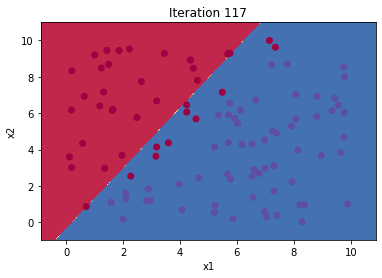

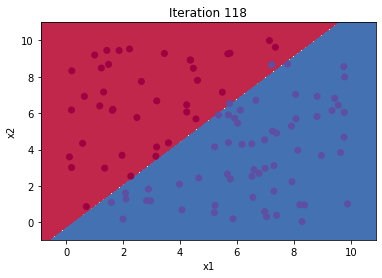

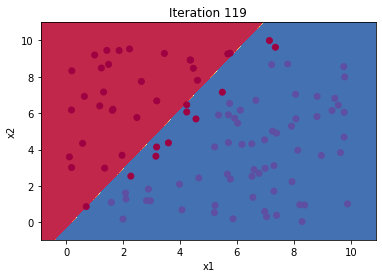

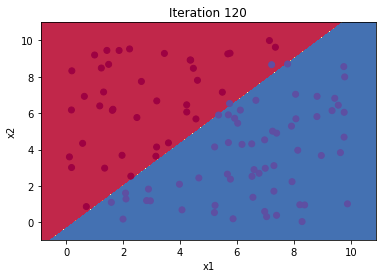

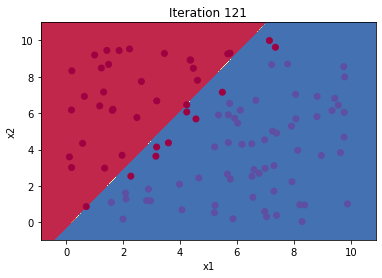

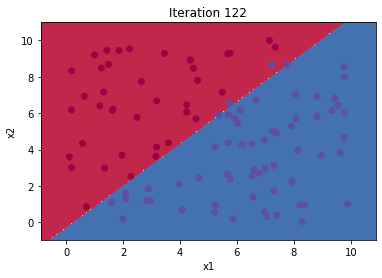

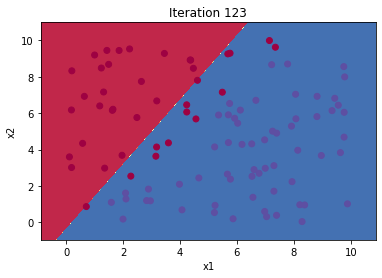

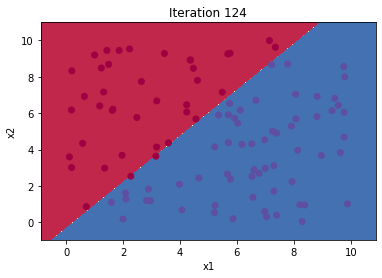

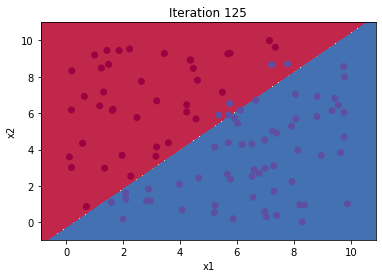

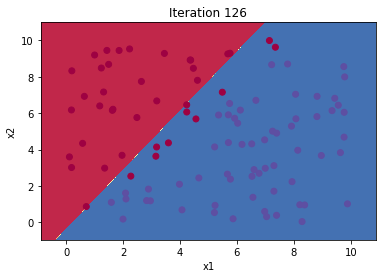

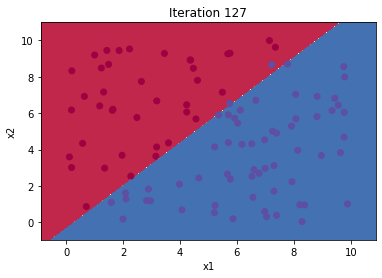

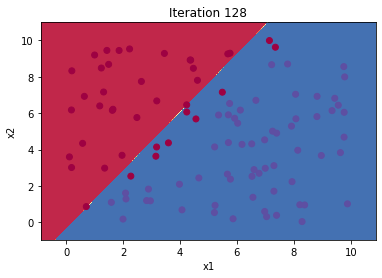

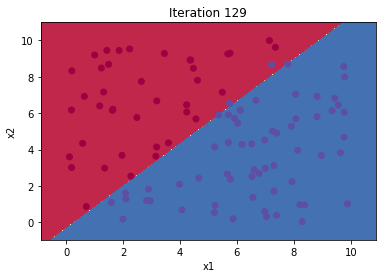

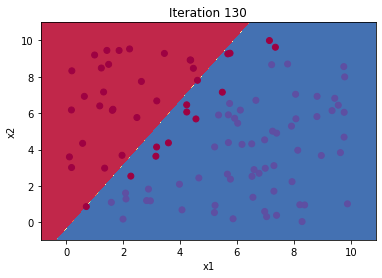

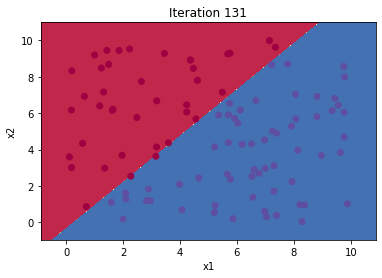

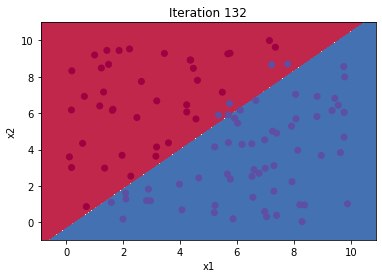

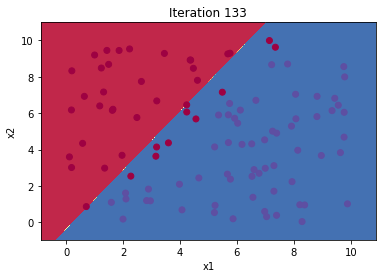

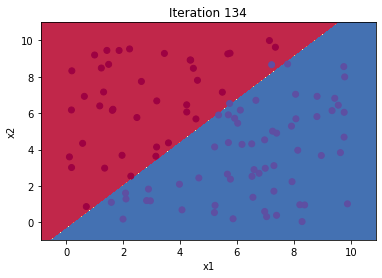

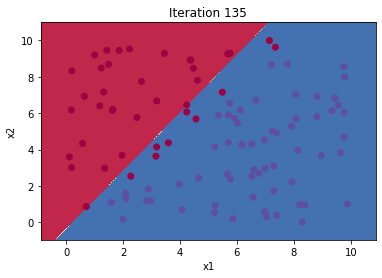

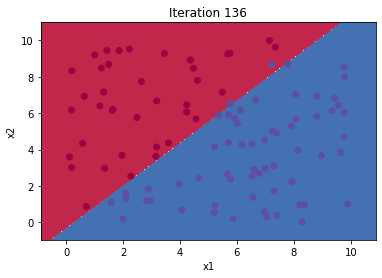

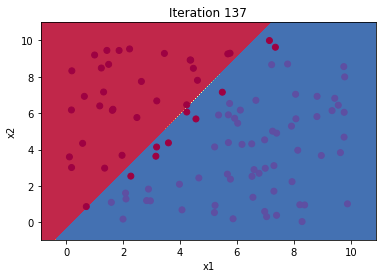

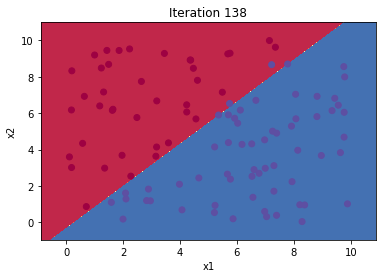

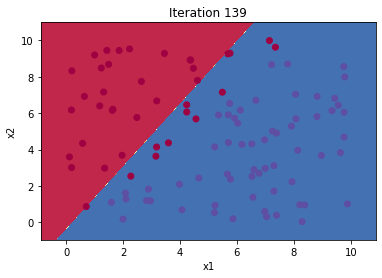

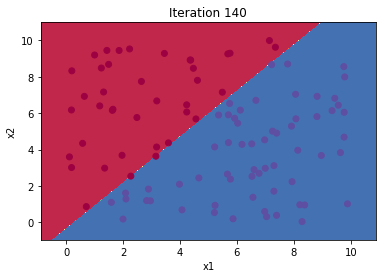

In [104]:
for i in range(len(history)):
    img = np.random.normal(size=(100,150))
    plt.figure(1); plt.clf()
    # plt.imshow(img)
    plot_decision_boundary(lambda X: predict(X, history[i]), X, Y)
    plt.title('Iteration ' + str(i))
    plt.pause(0.3)
    

Sometimes seems that the weights update is oversteping. 
May a learning rate $\lt 1$ make PLA converge faster?

converged in 141 iterations, found weights [[-1.39992720e-05  4.89967539e-05 -3.87955086e-05]]
g(x) selected hypothesis function


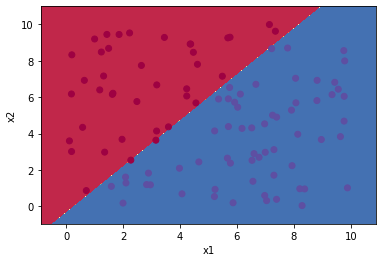

In [107]:
def PLA2(X, Y, iterations=100, seed=0, learning_rate=0.1):
    weights_history = []
    current_weight = np.zeros((1,X.shape[1]))
    weights_history.append(current_weight)
    
    
    for i in range(iterations):
        predicted = predict(X, current_weight)
        for result_i in range(len(Y)):
            if predicted[result_i] != Y[result_i]:
                # print('current weight', current_weight, ', y', Y[result_i], ', missed X', X[result_i,:], ', new weight',  current_weight + (Y[result_i] * X[result_i,:])* learning_rate)
                current_weight = current_weight*(1-learning_rate) + (Y[result_i] * X[result_i,:]) * learning_rate
                weights_history.append(current_weight)
                break

    return (current_weight, weights_history)

weights, history = PLA2(X,Y, iterations=10000, learning_rate=0.000001)
print('converged in', str(len(history)), 'iterations, found weights', weights)
print('g(x) selected hypothesis function')
plot_decision_boundary(lambda X: predict(X, weights), X, Y)

A learning rate didnt help.
May be a random initialization instead initilizing the weights with zeros??

converged in 16 iterations, found weights [[-0.05337574  0.11068522 -0.08527144]]
g(x) selected hypothesis function


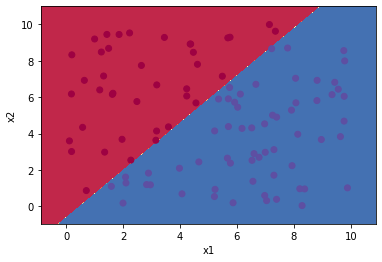

In [170]:
def PLA3(X, Y, iterations=100, seed=0, learning_rate=0.1):
    weights_history = []
    np.random.seed(seed)
    current_weight = np.random.rand(1,X.shape[1])
    weights_history.append(current_weight)
    
    
    for i in range(iterations):
        predicted = predict(X, current_weight)
        for result_i in range(len(Y)):
            if predicted[result_i] != Y[result_i]:
                # print('current weight', current_weight, ', y', Y[result_i], ', missed X', X[result_i,:], ', new weight',  current_weight + (Y[result_i] * X[result_i,:])* learning_rate)
                current_weight = current_weight*(1-learning_rate) + (Y[result_i] * X[result_i,:]) * learning_rate
                weights_history.append(current_weight)
                break

    return (current_weight, weights_history)

weights, history = PLA3(X,Y, iterations=10000, seed=9, learning_rate=0.01)
print('converged in', str(len(history)), 'iterations, found weights', weights)
print('g(x) selected hypothesis function')
plot_decision_boundary(lambda X: predict(X, weights), X, Y)

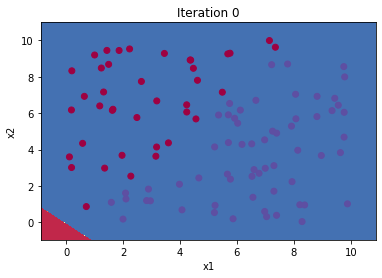

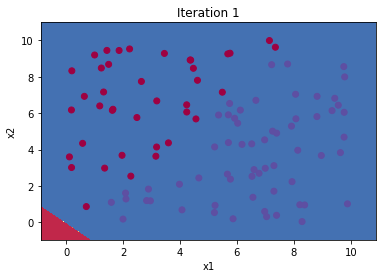

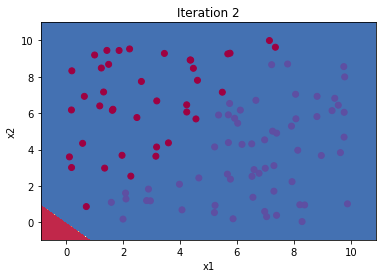

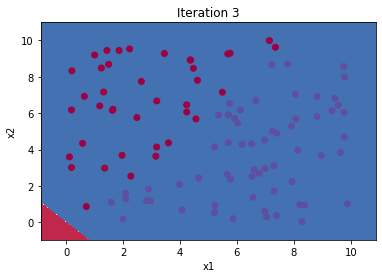

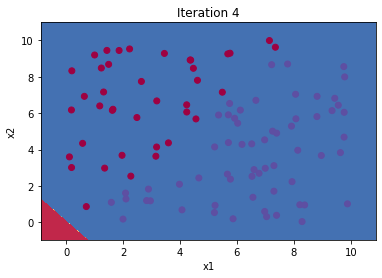

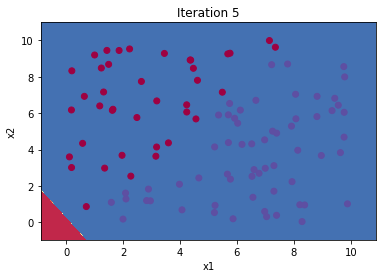

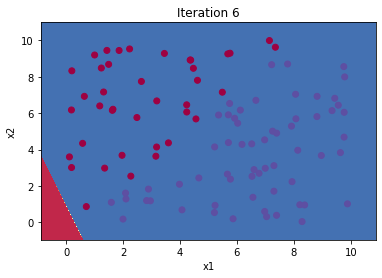

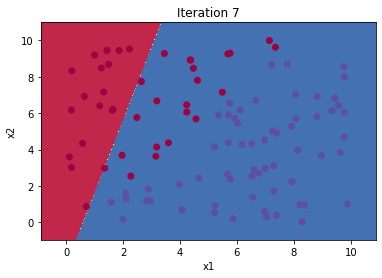

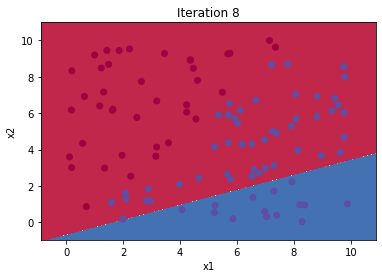

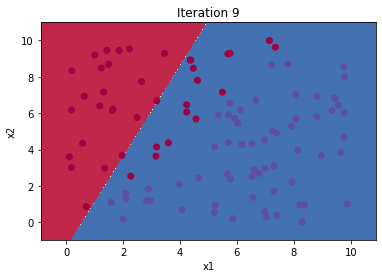

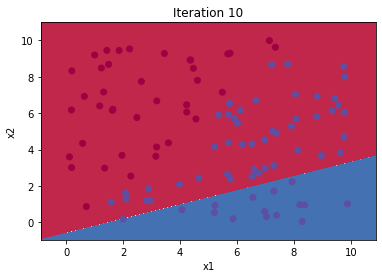

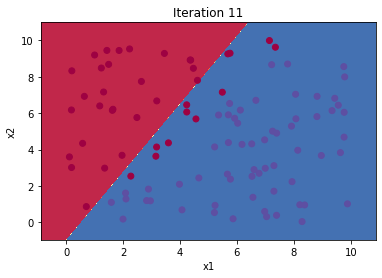

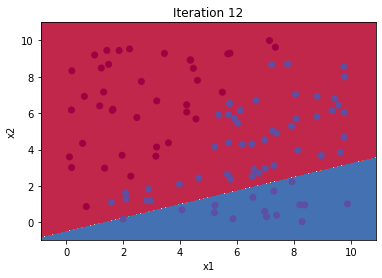

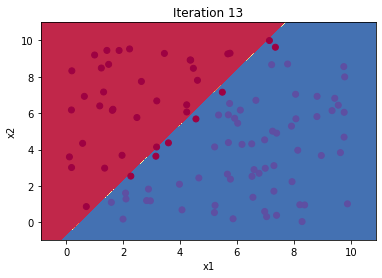

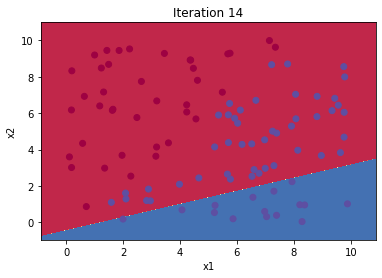

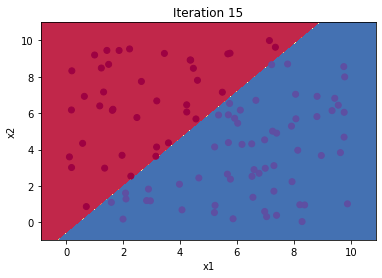

In [171]:
for i in range(len(history)):
    img = np.random.normal(size=(100,150))
    plt.figure(1); plt.clf()
    # plt.imshow(img)
    plot_decision_boundary(lambda X: predict(X, history[i]), X, Y)
    plt.title('Iteration ' + str(i))
    plt.pause(0.3)

Tried different seeds and learning rates, found one that make the PLA converge in 16 iterations.

More one experiment, may be shuffling the missclassified samples vector could help in some way.

converged in 138 iterations, found weights [[-16.03297016  52.44064863 -41.22098871]]
g(x) selected hypothesis function


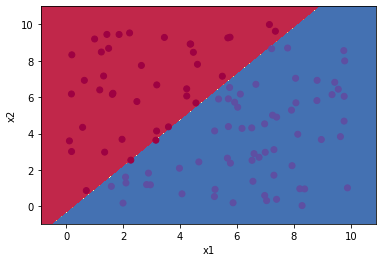

In [167]:
def PLA4(X, Y, iterations=100, seed=0, learning_rate=0.1):
    weights_history = []
    np.random.seed(seed)
    current_weight = np.random.rand(1,X.shape[1])
    weights_history.append(current_weight)
    
    
    for i in range(iterations):
        predicted = predict(X, current_weight)

        missclassified_X = X[(predicted != Y)[:,0],:]
        missclassified_Y = Y[(predicted != Y)[:,0],:]

        if len(missclassified_X) > 0:
            permutation = list(np.random.permutation(len(missclassified_Y)))
            shuffled_missclassified_X = missclassified_X[permutation, :]
            shuffled_missclassified_Y = missclassified_Y[permutation, :]
            # if i % 100000 == 0:
            #     print('current weight', current_weight, ', y', shuffled_missclassified_Y[0,:], ', missed X', shuffled_missclassified_X[0,:], ', new weight',  current_weight + (shuffled_missclassified_Y[0,:] * shuffled_missclassified_X[0,:]) * learning_rate)
            current_weight = current_weight + (shuffled_missclassified_Y[0,:] * shuffled_missclassified_X[0,:]) * learning_rate
            weights_history.append(current_weight)
        else:
            break

    return (current_weight, weights_history)

weights, history = PLA4(X,Y, iterations=10000, seed=4, learning_rate=1)
print('converged in', str(len(history)), 'iterations, found weights', weights)
print('g(x) selected hypothesis function')
plot_decision_boundary(lambda X: predict(X, weights), X, Y)




May be a more extreme case with more datapoints.

In [181]:
X = generateX(1000, amplitude=1000)
Y = f(X)

weights, history = PLA(X,Y, iterations=100000)
print('converged in', str(len(history)), 'iterations, found weights', weights)
print('g(x) selected hypothesis function')

prediction = predict(X, weights)
(Y == prediction).all()

converged in 265 iterations, found weights [[  -22.          5692.48704602 -4271.90508107]]
g(x) selected hypothesis function


True

In [182]:
weights, history = PLA4(X,Y, iterations=100000, seed=4, learning_rate=0.1)
print('converged in', str(len(history)), 'iterations, found weights', weights)
print('g(x) selected hypothesis function')

prediction = predict(X, weights)
(Y == prediction).all()

converged in 197 iterations, found weights [[-3.29701610e-02  6.96550548e+02 -5.22585989e+02]]
g(x) selected hypothesis function


True

Ok, in this case PLA4 converged faster 0.7 seconds against 1min 39s from PLA first version.